# Mehmet Furkan Çalışkan 2210765026

# Part I Theory

### 1. What are activation functions, and why are they important in neural networks:

Activation functions are mathematical functions used in neural networks to decide how a neuron should respond to input. They’re key to helping networks learn complex patterns.


They have a few functions, first is that they provide non-linearity. Without activation functions, a neural network would only be able to perform simple linear operations. They introduce non-linearity, which lets the network solve complex problems like image or speech recognition.

Also, they shape the output values, sometimes squashing them into specific ranges (like 0 to 1), which is helpful for tasks like predicting probabilities.

Lastly, during training, activation functions affect how the error gets passed back through the network, influencing how quickly and effectively the model learns.

Sigmoid: Outputs values between 0 and 1, does binary classification, but can slow down training due to vanishing gradients.
Tanh: Outputs values between -1 and 1, better for hidden layers but still suffers from vanishing gradients.
ReLU: Outputs values between 0 and infinity, popular for hidden layers because it’s fast and helps prevent vanishing gradients.
Leaky ReLU: A variant of ReLU that allows small negative outputs, helping avoid neurons getting stuck.
Softmax: Converts outputs into probabilities for multi-class classification.

### 2. Consider the convolutional neural network defined by the layers below. Fill in the shape of the output volume and the number of parameters at each layer.

 • CONV5-8: Convolutional layer with 8 filters of 5 ×5, padding is 0, stride is 1.: 5x5 filters give (64-5)/1 +1 as output since no padding, answer is 60x60x8 (8 is filter number) Parameter number is :
 Each filter has a size of 5 × 5 × 3 (height × width × depth).
Total parameters per filter = 5 × 5 × 3 = 75.
Since there are 8 filters, total parameters = 75 × 8 = 600.
Additionally, each filter has a bias term, so total parameters = 600 + 8 = 608.

 • POOL-2: Since the stride is 2, we will divide by 2, answer : (30,30,32), No parameters in max-pooling layers


 • CONV3-16: 28,28,16 Number of parameters:

Total parameters per filter = 3 × 3 × 8 = 72.
Since there are 16 filters, total parameters = 72 × 16 = 1152.
Plus biases for each filter: 16 biases, so total parameters = 1152 + 16 = 1168.

• POOL-3: 13 × 13 × 16, again no parameters.

• FC-30: The output volume is 13 × 13 × 16, so we flatten it into a vector of size 13×13×16=2704 
Number of parameters:

Weights = 2704 × 30 = 81,120.
Plus biases = 30 biases.
Total parameters = 81,120 + 30 = 81,150.

output from the previous layer is a vector of size 30, which is fully connected to 5 neurons:
Number of parameters:

Weights = 30 × 5 = 150.
Plus biases = 5 biases.
Total parameters = 150 + 5 = 155.

\[
\begin{array}{|c|c|c|}
\hline
\textbf{Layer} & \textbf{Output Shape} & \textbf{Number of Parameters} \\
\hline
\text{Input} & 64 \times 64 \times 3 & 0 \\
\hline
\text{CONV5-8} & 60 \times 60 \times 8 & 608 \\
\hline
\text{POOL-2} & 30 \times 30 \times 8 & 0 \\
\hline
\text{CONV3-16} & 28 \times 28 \times 16 & 1168 \\
\hline
\text{POOL-3} & 13 \times 13 \times 16 & 0 \\
\hline
\text{FC-30} & 30 & 81,150 \\
\hline
\text{FC-5} & 5 & 155 \\
\hline
\end{array}
\]


# PART II:

## Multilayer Perceptron

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler
import cv2
import seaborn as sns
from sklearn.metrics import confusion_matrix

We are importing our images

In [3]:
IMAGE_SIZE = (124, 124)  # Input size
BATCH_SIZE = 16
EPOCHS = 10

parent_dir = r"Melanoma124x124"
TRAIN_DIR = r"\train"
TEST_DIR = r"\test"

def load_and_preprocess_images(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        class_dir = Path(directory) / label
        if not class_dir.is_dir():
            continue
        for img_file in tqdm(os.listdir(class_dir)):
            img_path = class_dir / img_file
            try:
                img = load_img(img_path, target_size=IMAGE_SIZE, color_mode="grayscale") # code for grayscaling
                img_array = img_to_array(img) / 255.0 #normalizing
                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    return np.array(images), np.array(labels)


In [72]:
train_images, train_labels = load_and_preprocess_images(parent_dir+TRAIN_DIR)
test_images, test_labels = load_and_preprocess_images(parent_dir+TEST_DIR)

100%|██████████| 921/921 [00:07<00:00, 118.33it/s]


In [73]:
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_labels)
test_labels = label_encoder.transform(test_labels)

In [74]:
train_labels

array([0, 0, 0, ..., 1, 1, 1])

In [75]:
test_labels

array([0, 0, 0, ..., 1, 1, 1])

In [76]:
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=30
)

### Our model has 2 hidden layers and 1 output layer, we are first trying the relu function, although making sigmoid as the output activaiton since we want to obtain a binary classifier.

In [73]:
model = models.Sequential([
    layers.Flatten(input_shape=IMAGE_SIZE + (1,)),  # Flatten 300x300x1 to 90000
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [74]:
tf.config.list_physical_devices('GPU')

[]

Below function decreases the learning rate by %10 after each epoch

In [12]:
def scheduler(epoch, lr):
    return float(lr * tf.math.exp(-0.1))

lr_scheduler = LearningRateScheduler(scheduler)

In [76]:
LEARNING_RATE = 0.005

optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

In [ ]:
model.compile(optimizer=optimizer, 
            loss='binary_crossentropy', 
            metrics=['accuracy'])

In [18]:
def model_mlp(train_images,train_labels,val_images,val_labels,size,activation,lr,epochs,batch_size):
    model = models.Sequential([
    layers.Flatten(input_shape=size + (1,)),  # Flatten 300x300x1 to 90000
    layers.Dense(128, activation=activation),
    layers.Dense(64, activation=activation),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, 
            loss='binary_crossentropy', 
            metrics=['accuracy'])
    history = model.fit(
    train_images, train_labels,
    validation_data=(val_images, val_labels),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[lr_scheduler]
    )
    return model,history

In [ ]:
def report_mlp(model,test_images,test_labels,history):

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    #This part reports the accuracy over the epoches, along with validation accuracy
    axes[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    axes[0].set_title('Accuracy per Epoch')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid()
    #This part calculates and reports metrics and plots the confusion matrix

    predictions = model.predict(test_images)  
    predictions = (predictions > 0.5).astype(int)  

    cm = confusion_matrix(test_labels, predictions)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'], ax=axes[1])
    axes[1].set_title('Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('True')

    plt.tight_layout()
    plt.show()

    TN, FP, FN, TP = cm.ravel()

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1_score:.2f}")

Epoch 1/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6146 - loss: 3.0754 - val_accuracy: 0.7105 - val_loss: 0.5817 - learning_rate: 0.0045
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7683 - loss: 0.4811 - val_accuracy: 0.7560 - val_loss: 0.4493 - learning_rate: 0.0041
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.7689 - loss: 0.4574 - val_accuracy: 0.7222 - val_loss: 0.6441 - learning_rate: 0.0037
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.7930 - loss: 0.4367 - val_accuracy: 0.7775 - val_loss: 0.4923 - learning_rate: 0.0034
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.8096 - loss: 0.3969 - val_accuracy: 0.8094 - val_loss: 0.3927 - learning_rate: 0.0030
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8209 - loss: 0.3829 - val_accuracy: 0.8295 - val_loss: 0.3627 - learning_rate: 0.0027
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8282 - loss: 0.

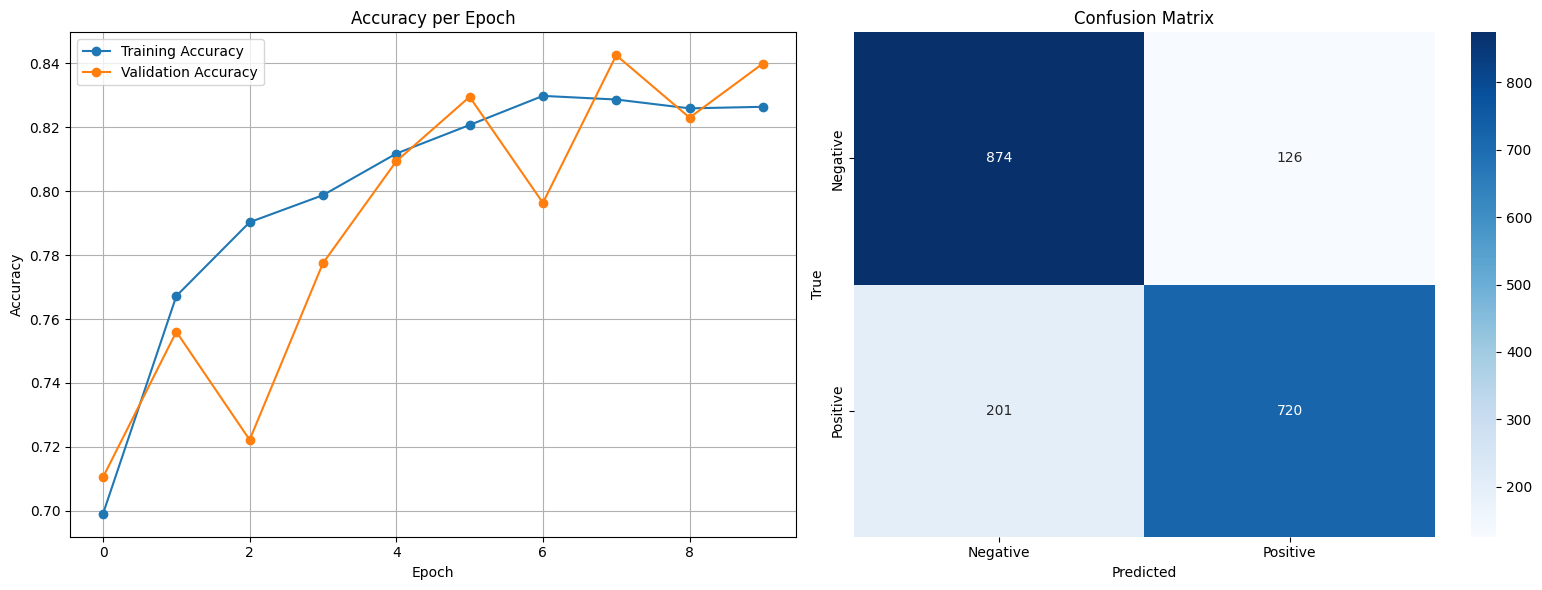

Accuracy: 0.83
Precision: 0.85
Recall: 0.78
F1-Score: 0.81


In [24]:
model,history = model_mlp(train_images,train_labels,val_images,val_labels,(124,124),'relu',0.005,10,16)
report_mlp(model,test_images,test_labels,history)

Epoch 1/10


c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


385/385 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5644 - loss: 0.6616 - val_accuracy: 0.6350 - val_loss: 0.6204 - learning_rate: 0.0045
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5983 - loss: 0.6322 - val_accuracy: 0.6265 - val_loss: 0.6321 - learning_rate: 0.0041
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6165 - loss: 0.6230 - val_accuracy: 0.6350 - val_loss: 0.6087 - learning_rate: 0.0037
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6181 - loss: 0.6228 - val_accuracy: 0.4671 - val_loss: 0.6440 - learning_rate: 0.0034
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6051 - loss: 0.6453 - val_accuracy: 0.6344 - val_loss: 0.6135 - learning_rate: 0.0030
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6306 - loss: 0.6158 - val_accuracy: 0.6402 - val_loss: 0.6120 - learning_rate: 0.0027
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6204 - loss: 0.6120 - val_

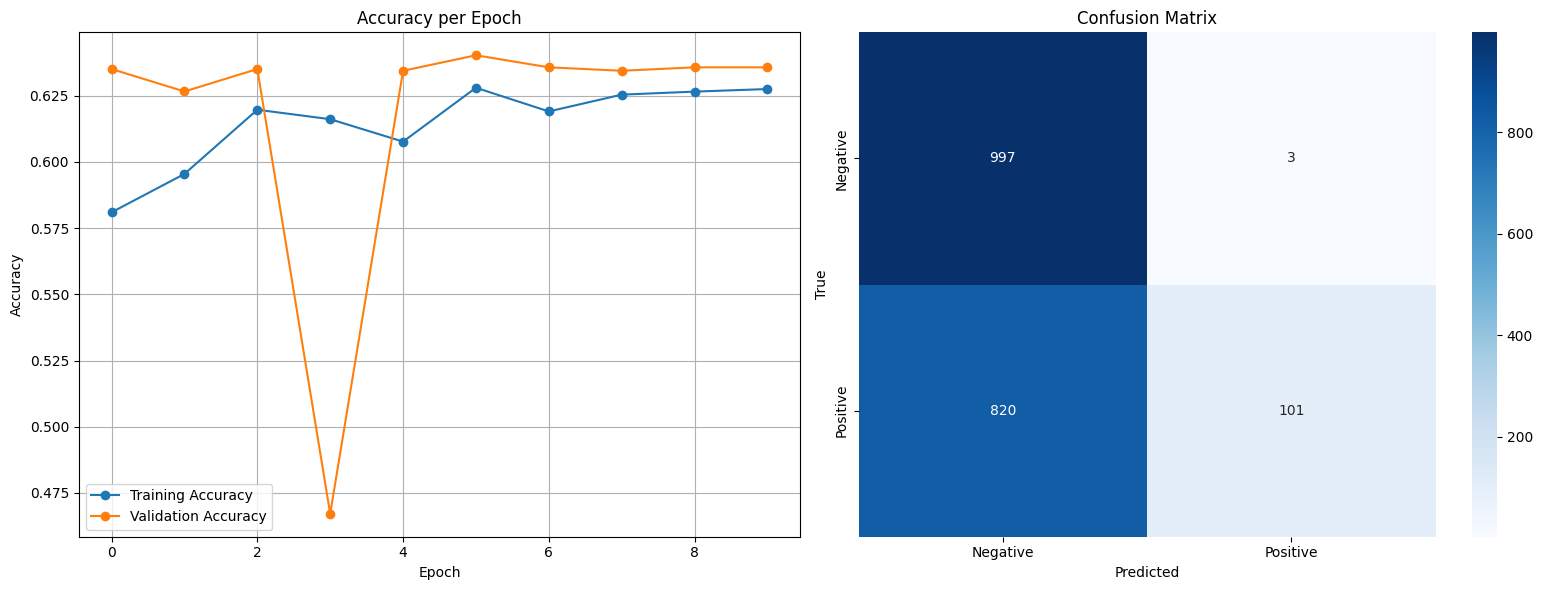

Accuracy: 0.57
Precision: 0.97
Recall: 0.11
F1-Score: 0.20


In [77]:
model,history = model_mlp(train_images,train_labels,val_images,val_labels,(124,124),'sigmoid',0.005,10,16)
report_mlp(model,test_images,test_labels,history)

### Sigmoid function fails to beat the reLU, reLU gives better outcomes overall with the learninng rate 0.005, sigmoid doesn't do much learning.

Epoch 1/10


c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


385/385 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5604 - loss: 7.9388 - val_accuracy: 0.5569 - val_loss: 0.6698 - learning_rate: 0.0181
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5637 - loss: 0.6610 - val_accuracy: 0.5738 - val_loss: 0.6564 - learning_rate: 0.0164
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5867 - loss: 0.6522 - val_accuracy: 0.6090 - val_loss: 0.6268 - learning_rate: 0.0148
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6099 - loss: 0.6229 - val_accuracy: 0.6252 - val_loss: 0.6174 - learning_rate: 0.0134
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6099 - loss: 0.6254 - val_accuracy: 0.6376 - val_loss: 0.6133 - learning_rate: 0.0121
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6295 - loss: 0.6107 - val_accuracy: 0.6454 - val_loss: 0.6020 - learning_rate: 0.0110
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.5918 - loss: 0.6401 - val_

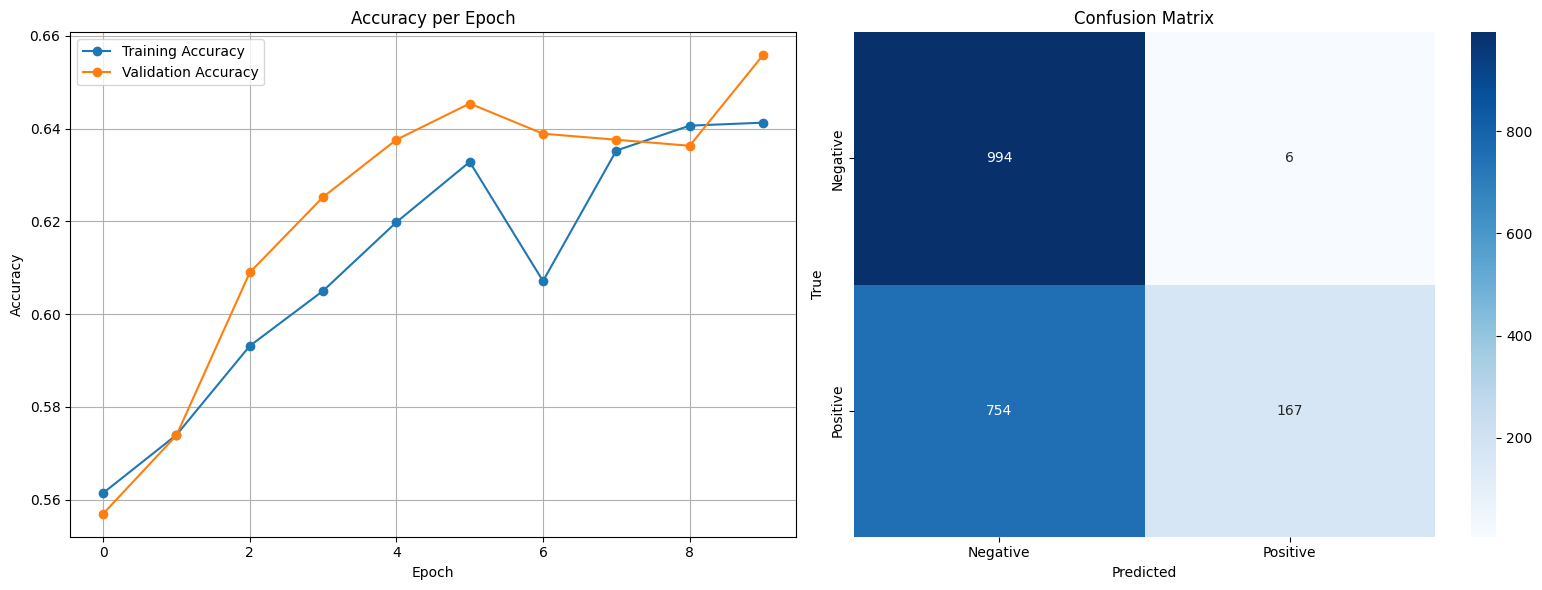

Accuracy: 0.60
Precision: 0.97
Recall: 0.18
F1-Score: 0.31


In [78]:
model,history = model_mlp(train_images,train_labels,val_images,val_labels,(124,124),'relu',0.02,10,16)
report_mlp(model,test_images,test_labels,history)

### Leaening rate of 0.02 seems to overshoot the target, 0.005 seems  better

Epoch 1/10


c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


385/385 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5028 - loss: 0.7266 - val_accuracy: 0.5277 - val_loss: 0.6935 - learning_rate: 0.0181
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5023 - loss: 0.7052 - val_accuracy: 0.5277 - val_loss: 0.6916 - learning_rate: 0.0164
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4888 - loss: 0.6998 - val_accuracy: 0.5277 - val_loss: 0.6916 - learning_rate: 0.0148
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5125 - loss: 0.6983 - val_accuracy: 0.4723 - val_loss: 0.6935 - learning_rate: 0.0134
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5177 - loss: 0.6954 - val_accuracy: 0.5277 - val_loss: 0.6940 - learning_rate: 0.0121
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5040 - loss: 0.6967 - val_accuracy: 0.5277 - val_loss: 0.6917 - learning_rate: 0.0110
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5054 - loss: 0.6961 - val_

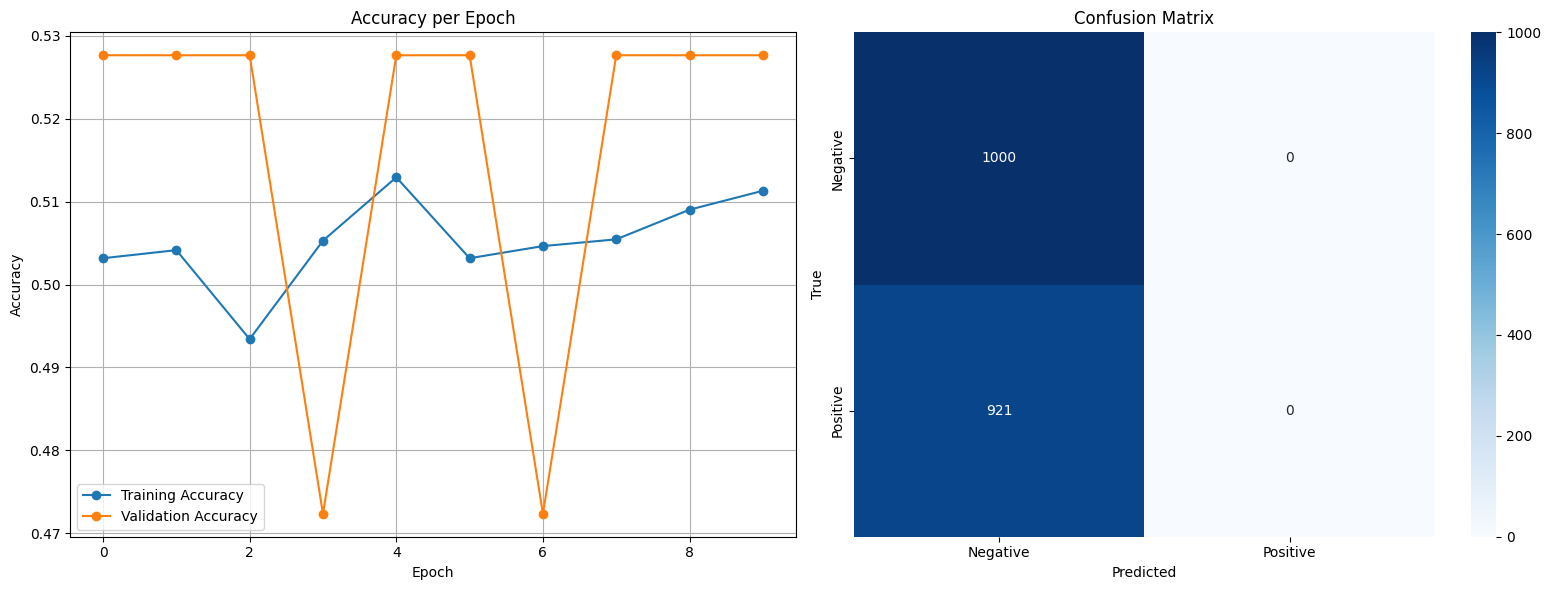

Accuracy: 0.52
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


In [28]:
model,history = model_mlp(train_images,train_labels,val_images,val_labels,(124,124),'sigmoid',0.02,10,16)
report_mlp(model,test_images,test_labels,history)

## Sigmoid is worse at classification than reLU, the best learning rate is 0.005.

In [29]:
def resize_images_opencv(images, size=(50, 50)):
    resized_images = []
    for img in images:
        resized_images.append(cv2.resize(img, size))
    return np.array(resized_images)

In [79]:
train_images_50 = resize_images_opencv(train_images)
val_images_50 = resize_images_opencv(val_images)
test_images_50 = resize_images_opencv(test_images)

Epoch 1/10


c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6745 - loss: 0.7580 - val_accuracy: 0.7820 - val_loss: 0.4177 - learning_rate: 0.0045
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7725 - loss: 0.4624 - val_accuracy: 0.7521 - val_loss: 0.5071 - learning_rate: 0.0041
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8036 - loss: 0.4112 - val_accuracy: 0.8165 - val_loss: 0.3820 - learning_rate: 0.0037
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8146 - loss: 0.3918 - val_accuracy: 0.7931 - val_loss: 0.4005 - learning_rate: 0.0034
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8261 - loss: 0.3685 - val_accuracy: 0.8354 - val_loss: 0.3573 - learning_rate: 0.0030
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8233 - loss: 0.3572 - val_accuracy: 0.8399 - val_loss: 0.3392 - learning_rate: 0.0027
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8307 - loss: 0.3517 - val_accurac

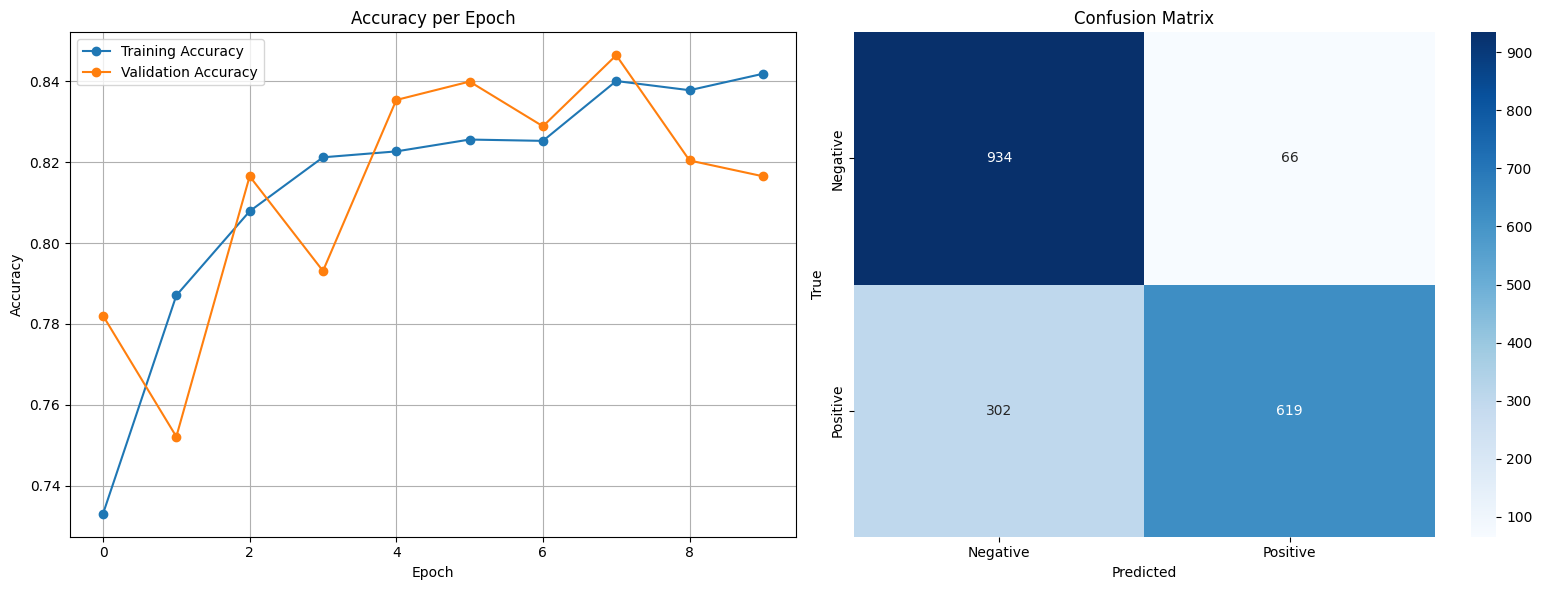

Accuracy: 0.81
Precision: 0.90
Recall: 0.67
F1-Score: 0.77


In [ ]:
model,history = model_mlp(train_images_50,train_labels,val_images_50,val_labels,(50,50),'relu',0.005,10,16)
report_mlp(model,test_images,test_labels,history)

## 50x50 images performed better for reLU, in precision, but worse in recall.

Epoch 1/10


c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5335 - loss: 0.7140 - val_accuracy: 0.6135 - val_loss: 0.6773 - learning_rate: 0.0045
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6112 - loss: 0.6499 - val_accuracy: 0.6487 - val_loss: 0.6224 - learning_rate: 0.0041
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6354 - loss: 0.6174 - val_accuracy: 0.6727 - val_loss: 0.5893 - learning_rate: 0.0037
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6582 - loss: 0.5955 - val_accuracy: 0.6688 - val_loss: 0.6003 - learning_rate: 0.0034
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6320 - loss: 0.5981 - val_accuracy: 0.6701 - val_loss: 0.5818 - learning_rate: 0.0030
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6734 - loss: 0.5784 - val_accuracy: 0.6766 - val_loss: 0.5825 - learning_rate: 0.0027
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6365 - loss: 0.6018 - val_accurac

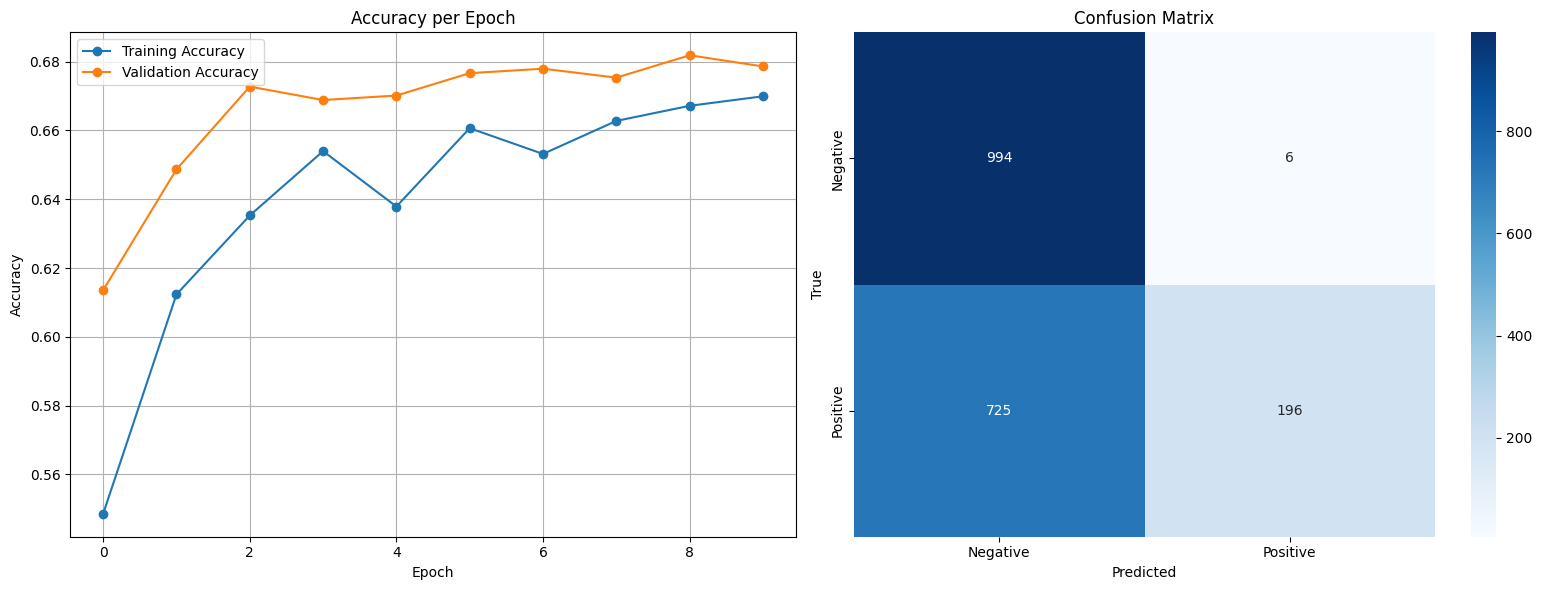

Accuracy: 0.62
Precision: 0.97
Recall: 0.21
F1-Score: 0.35


In [32]:
model,history = model_mlp(train_images,train_labels,val_images,val_labels,(50,50),'sigmoid',0.005,10,16)
report_mlp(model,test_images,test_labels,history)

## Model is tending to give negative outcomes when sigmoid is used, again ReLU is better.

Epoch 1/10


c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5929 - loss: 3.1685 - val_accuracy: 0.7749 - val_loss: 0.4519 - learning_rate: 0.0181
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7514 - loss: 0.4927 - val_accuracy: 0.7964 - val_loss: 0.4500 - learning_rate: 0.0164
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7787 - loss: 0.4507 - val_accuracy: 0.7977 - val_loss: 0.4081 - learning_rate: 0.0148
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7910 - loss: 0.4285 - val_accuracy: 0.7833 - val_loss: 0.4845 - learning_rate: 0.0134
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8054 - loss: 0.4074 - val_accuracy: 0.7859 - val_loss: 0.4126 - learning_rate: 0.0121
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7958 - loss: 0.4190 - val_accuracy: 0.8165 - val_loss: 0.3901 - learning_rate: 0.0110
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8110 - loss: 0.3964 - val_accurac

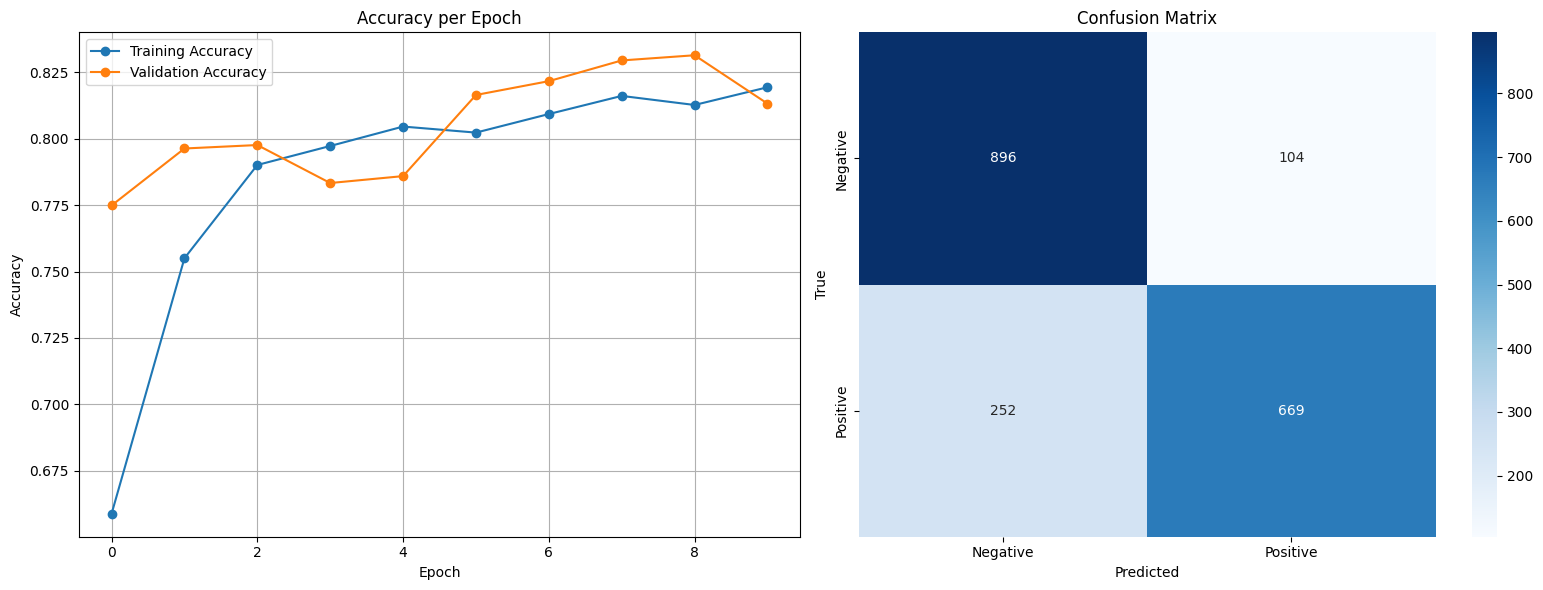

Accuracy: 0.81
Precision: 0.87
Recall: 0.73
F1-Score: 0.79


In [33]:
model,history = model_mlp(train_images,train_labels,val_images,val_labels,(50,50),'relu',0.02,10,16)
report_mlp(model,test_images,test_labels,history)

Epoch 1/10


c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


385/385 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5630 - loss: 0.6950 - val_accuracy: 0.4710 - val_loss: 0.6616 - learning_rate: 0.0181
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6008 - loss: 0.6315 - val_accuracy: 0.6350 - val_loss: 0.6092 - learning_rate: 0.0164
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6298 - loss: 0.6101 - val_accuracy: 0.4704 - val_loss: 0.6290 - learning_rate: 0.0148
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5928 - loss: 0.6489 - val_accuracy: 0.5277 - val_loss: 0.6935 - learning_rate: 0.0134
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5316 - loss: 0.6855 - val_accuracy: 0.4717 - val_loss: 0.6551 - learning_rate: 0.0121
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5680 - loss: 0.6544 - val_accuracy: 0.5960 - val_loss: 0.6441 - learning_rate: 0.0110
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5791 - loss: 0.6414 - val_accurac

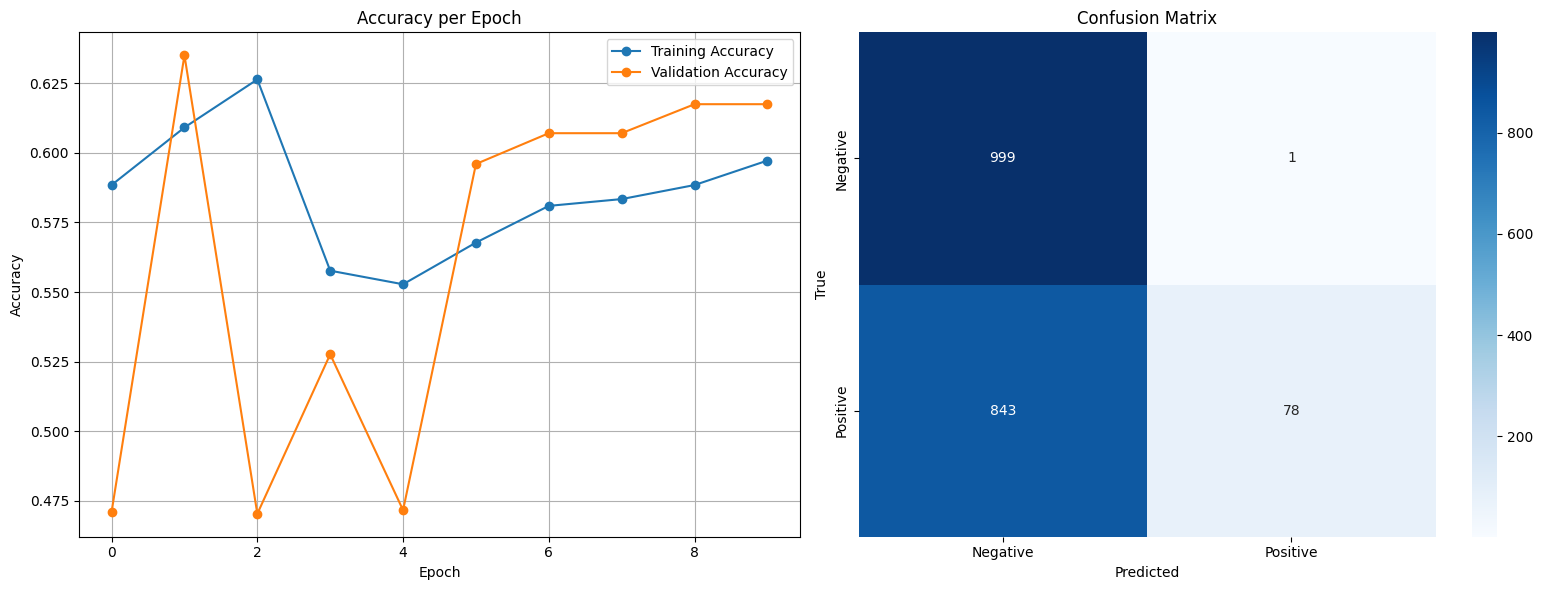

Accuracy: 0.56
Precision: 0.99
Recall: 0.08
F1-Score: 0.16


In [34]:
model,history = model_mlp(train_images,train_labels,val_images,val_labels,(50,50),'sigmoid',0.02,10,16)
report_mlp(model,test_images,test_labels,history)

## 50x50 images gave close results to 124x124 images, overall, reLU was the best activation function and learning rate 0.005 is looking better.

# Now, we will continue with CNN

In [36]:
IMAGE_SIZE = (124, 124)  # Input size
BATCH_SIZE = 16
EPOCHS = 10

parent_dir = r"Melanoma124x124"
TRAIN_DIR = r"\train"
TEST_DIR = r"\test"

def load_and_preprocess_images_cnn(directory):
    images = []
    labels = []
    for label in os.listdir(directory):
        class_dir = Path(directory) / label
        if not class_dir.is_dir():
            continue
        for img_file in tqdm(os.listdir(class_dir)):
            img_path = class_dir / img_file
            try:
                img = load_img(img_path, target_size=IMAGE_SIZE)
                img_array = img_to_array(img) / 255.0 
                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")
    return np.array(images), np.array(labels)

In [37]:
train_images_cnn, train_labels_cnn = load_and_preprocess_images_cnn(parent_dir+TRAIN_DIR)
test_images_cnn, test_labels_cnn = load_and_preprocess_images_cnn(parent_dir+TEST_DIR)

  0%|          | 0/4000 [00:00<?, ?it/s]

100%|██████████| 921/921 [00:00<00:00, 1602.18it/s]


In [38]:
train_images_cnn[0].shape

(124, 124, 3)

In [39]:
label_encoder = LabelEncoder()
train_labels_cnn = label_encoder.fit_transform(train_labels_cnn)
test_labels_cnn = label_encoder.transform(test_labels_cnn)

In [40]:
train_images_cnn, val_images_cnn, train_labels_cnn, val_labels_cnn = train_test_split(
    train_images_cnn, train_labels_cnn, test_size=0.2, random_state=30
)

In [41]:
train_labels_cnn

array([1, 1, 0, ..., 1, 1, 1])

In [42]:
test_labels_cnn

array([0, 0, 0, ..., 1, 1, 1])

### We defined 2 pooling layers of 2,2, with 2 filtering layers. We have chosen 60 as the neuron number for our only hidden layer.

In [51]:
def model_cnn(activation,lr,train_images, train_labels,test_images, test_labels,EPOCHS,BATCH_SIZE):
    model = models.Sequential([
    # Convolutional Layers
    layers.Conv2D(32, (3, 3), activation=activation, input_shape=(124, 124,3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation=activation),
    layers.MaxPooling2D((2, 2)),
    
    # Flatten
    layers.Flatten(),
    
    # Fully Connected Layers
    layers.Dense(60, activation=activation),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
    ])


    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

    history = model.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[lr_scheduler]
    )
    return model,history
    

In [61]:
def report_cnn(model,test_images,test_labels,history):

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    axes[0].plot(history['accuracy'], label='Training Accuracy', marker='o')
    axes[0].plot(history['val_accuracy'], label='Validation Accuracy', marker='o')
    axes[0].set_title('Accuracy per Epoch')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid()

    predictions = model.predict(test_images)  
    predictions = (predictions > 0.5).astype(int)  

    cm = confusion_matrix(test_labels, predictions)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], 
                yticklabels=['Negative', 'Positive'], ax=axes[1])
    axes[1].set_title('Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('True')

    plt.tight_layout()
    plt.show()

    TN, FP, FN, TP = cm.ravel()

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1_score:.2f}")

Epoch 1/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.6938 - loss: 1.4855 - val_accuracy: 0.5543 - val_loss: 0.6929 - learning_rate: 0.0045
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.8430 - loss: 0.3754 - val_accuracy: 0.8478 - val_loss: 0.3479 - learning_rate: 0.0041
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.8573 - loss: 0.3266 - val_accuracy: 0.8341 - val_loss: 0.3172 - learning_rate: 0.0037
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.8789 - loss: 0.2857 - val_accuracy: 0.8660 - val_loss: 0.3032 - learning_rate: 0.0034
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.8639 - loss: 0.3096 - val_accuracy: 0.8731 - val_loss: 0.2941 - learning_rate: 0.0030
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.8817 - loss: 0.2729 - val_accuracy: 0.8829 - val_loss: 0.2749 - learning_rate: 0.0027
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 27s 70ms/step - accuracy: 0.8912 - l

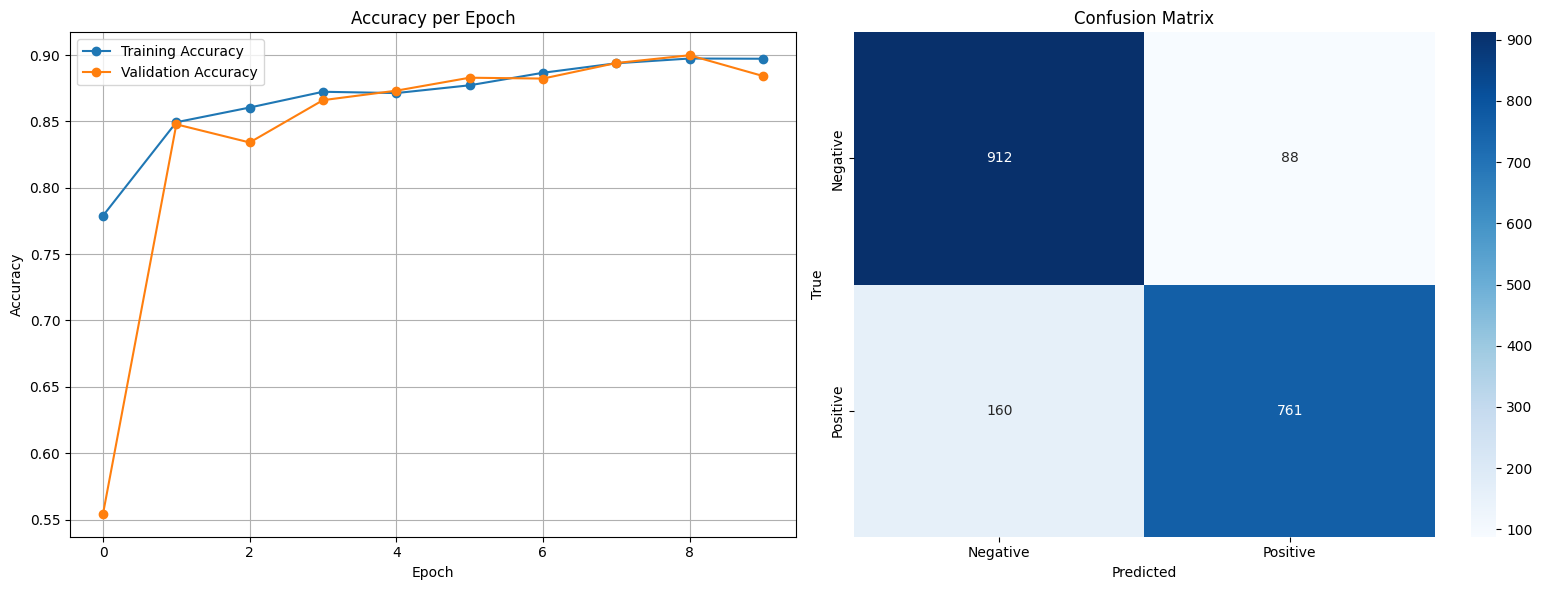

Accuracy: 0.87
Precision: 0.90
Recall: 0.83
F1-Score: 0.86


In [63]:
model,history = model_cnn('relu',0.005,train_images_cnn, train_labels_cnn,val_images_cnn, val_labels_cnn,10,16)
report_cnn(model,test_images_cnn,test_labels_cnn,history)

c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 37s 94ms/step - accuracy: 0.5213 - loss: 0.9202 - val_accuracy: 0.5277 - val_loss: 0.6921 - learning_rate: 0.0045
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.5152 - loss: 0.6944 - val_accuracy: 0.5277 - val_loss: 0.7106 - learning_rate: 0.0041
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - accuracy: 0.4995 - loss: 0.7002 - val_accuracy: 0.4723 - val_loss: 0.6937 - learning_rate: 0.0037
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 34s 87ms/step - accuracy: 0.5215 - loss: 0.6950 - val_accuracy: 0.5277 - val_loss: 0.6917 - learning_rate: 0.0034
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 34s 88ms/step - accuracy: 0.5161 - loss: 0.6943 - val_accuracy: 0.4723 - val_loss: 0.6950 - learning_rate: 0.0030
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.5112 - loss: 0.6948 - val_accuracy: 0.4723 - val_loss: 0.6934 - learning_rate: 0.0027
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 30s 78ms/step - accuracy: 0.5181 - l

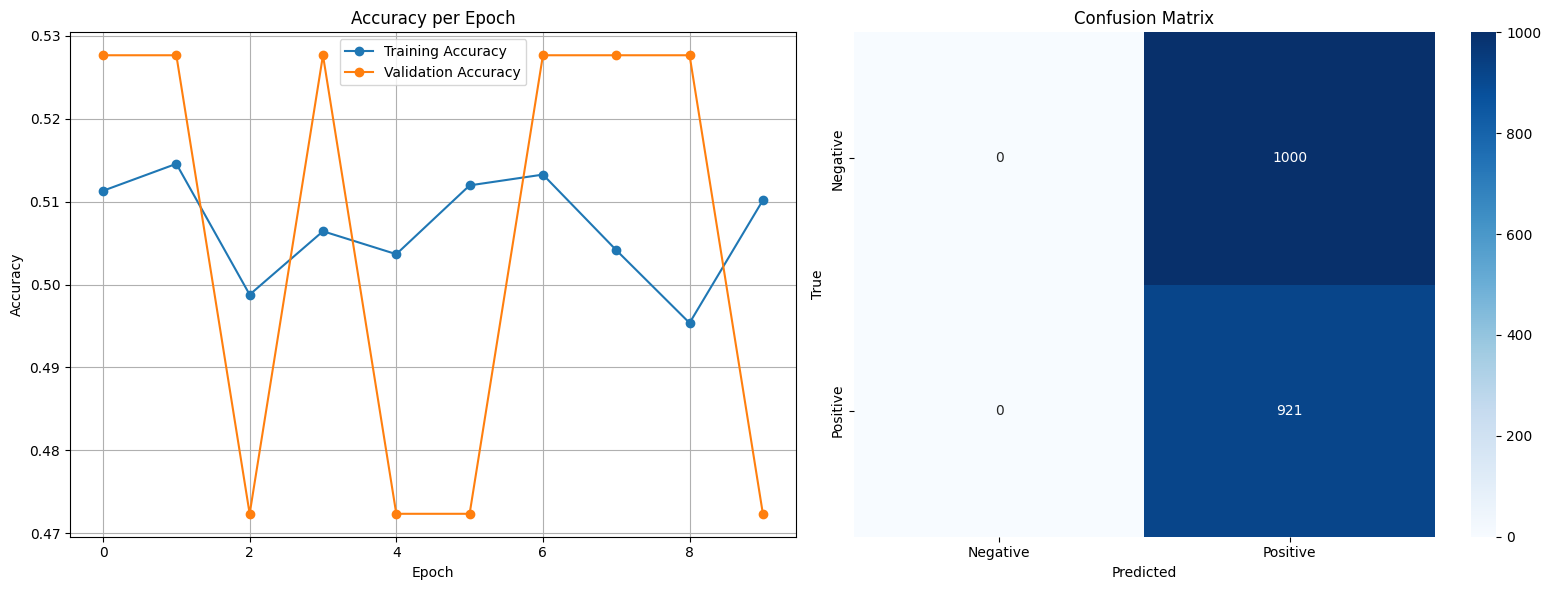

Accuracy: 0.48
Precision: 0.48
Recall: 1.00
F1-Score: 0.65


In [80]:
model,history = model_cnn('sigmoid',0.005,train_images_cnn, train_labels_cnn,val_images_cnn, val_labels_cnn,10,16)
report_cnn(model,test_images_cnn,test_labels_cnn,history)

### Unfortunately, the sigmoid model with these parmeters doesn't learn at all. But the ReLU model gave better performance than MLP model. 

c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.5178 - loss: 6.4408 - val_accuracy: 0.5277 - val_loss: 0.6917 - learning_rate: 0.0181
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.5190 - loss: 0.6928 - val_accuracy: 0.5277 - val_loss: 0.6922 - learning_rate: 0.0164
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.5267 - loss: 0.6924 - val_accuracy: 0.5277 - val_loss: 0.6920 - learning_rate: 0.0148
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.5110 - loss: 0.6931 - val_accuracy: 0.5277 - val_loss: 0.6916 - learning_rate: 0.0134
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.5154 - loss: 0.6928 - val_accuracy: 0.5277 - val_loss: 0.6921 - learning_rate: 0.0121
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 26s 68ms/step - accuracy: 0.5213 - loss: 0.6929 - val_accuracy: 0.5277 - val_loss: 0.6923 - learning_rate: 0.0110
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.5275 - l

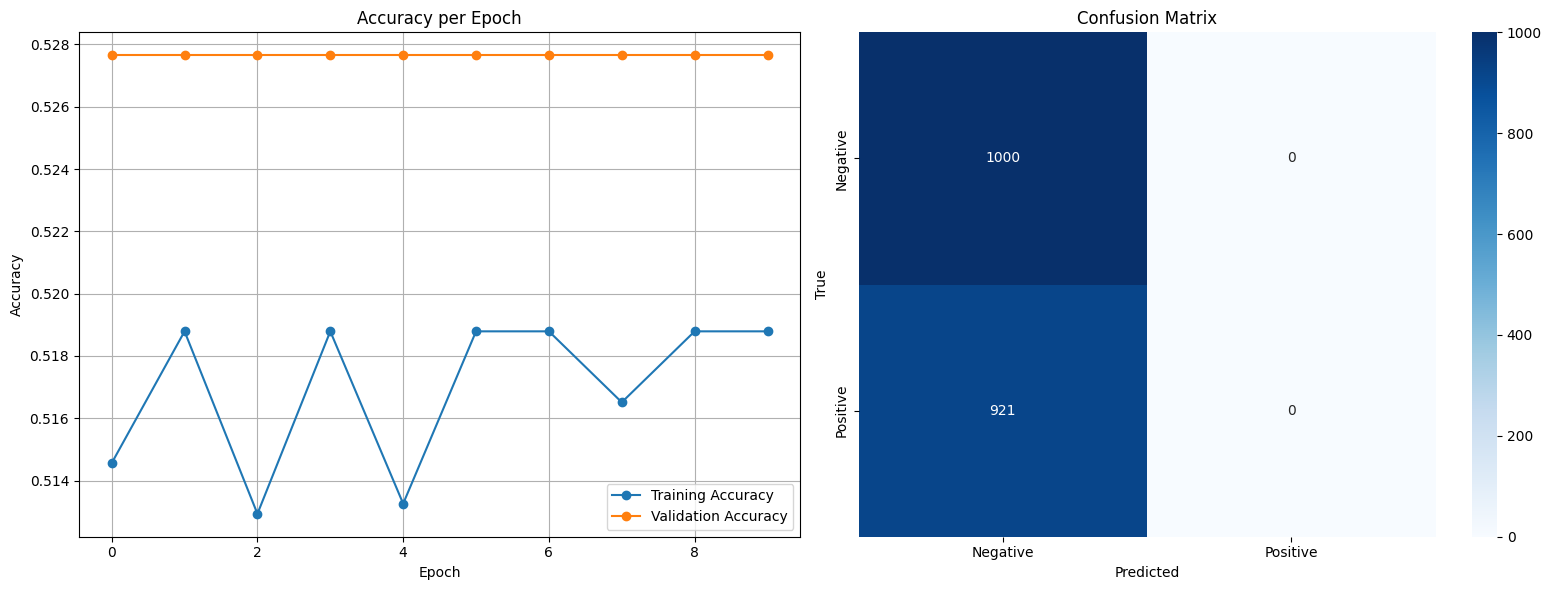

Accuracy: 0.52
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


In [65]:
model,history = model_cnn('relu',0.02,train_images_cnn, train_labels_cnn,val_images_cnn, val_labels_cnn,10,16)
report_cnn(model,test_images_cnn,test_labels_cnn,history)

c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 30s 74ms/step - accuracy: 0.5086 - loss: 0.8851 - val_accuracy: 0.5277 - val_loss: 0.6918 - learning_rate: 0.0181
Epoch 2/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 28s 74ms/step - accuracy: 0.5000 - loss: 0.7055 - val_accuracy: 0.5277 - val_loss: 0.6932 - learning_rate: 0.0164
Epoch 3/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 28s 72ms/step - accuracy: 0.4972 - loss: 0.7037 - val_accuracy: 0.4723 - val_loss: 0.6960 - learning_rate: 0.0148
Epoch 4/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.4960 - loss: 0.7032 - val_accuracy: 0.5277 - val_loss: 0.6918 - learning_rate: 0.0134
Epoch 5/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 31s 79ms/step - accuracy: 0.5099 - loss: 0.7058 - val_accuracy: 0.5277 - val_loss: 0.6918 - learning_rate: 0.0121
Epoch 6/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 40s 104ms/step - accuracy: 0.5004 - loss: 0.6994 - val_accuracy: 0.5277 - val_loss: 0.6918 - learning_rate: 0.0110
Epoch 7/10
385/385 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.5174 - 

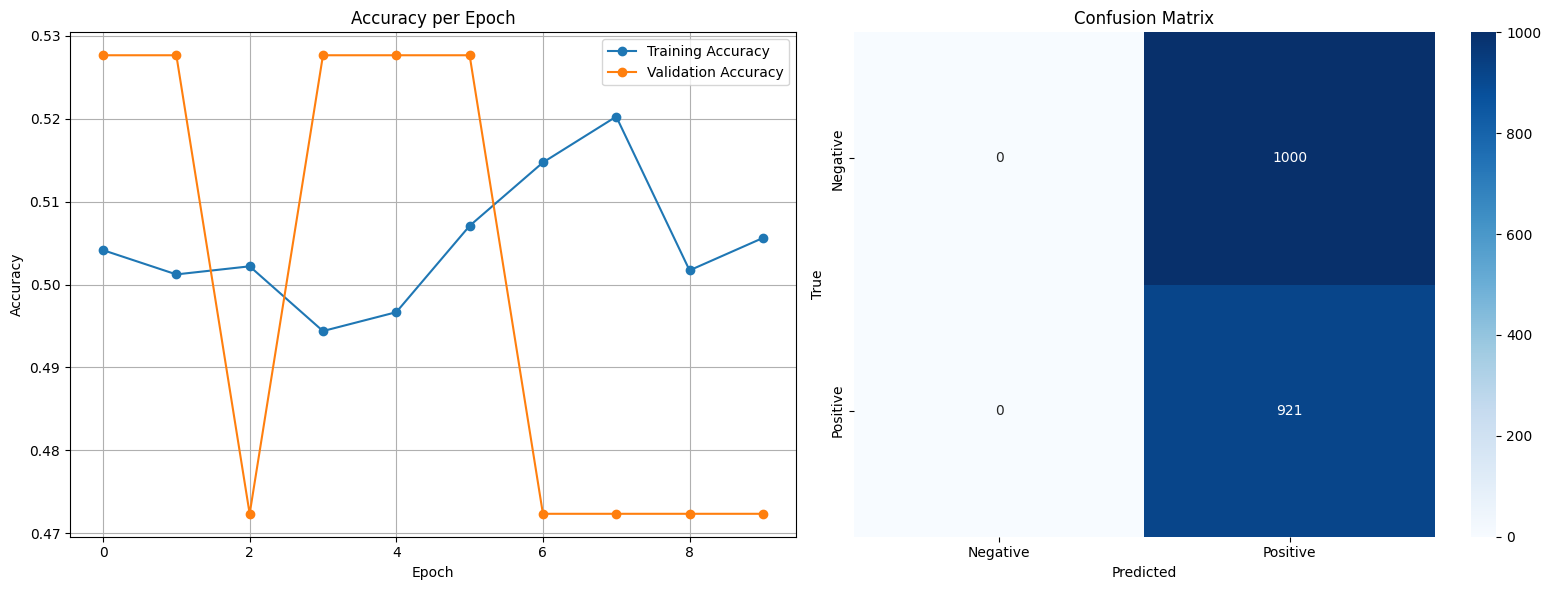

Accuracy: 0.48
Precision: 0.48
Recall: 1.00
F1-Score: 0.65


In [66]:
model,history = model_cnn('sigmoid',0.02,train_images_cnn, train_labels_cnn,val_images_cnn, val_labels_cnn,10,16)
report_cnn(model,test_images_cnn,test_labels_cnn,history)

### This learning rate seems to always overshoot the target, for both models, learning has not occured.

c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.6554 - loss: 0.8667 - val_accuracy: 0.4763 - val_loss: 1.8109 - learning_rate: 0.0045
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.7546 - loss: 0.5445 - val_accuracy: 0.8191 - val_loss: 0.3617 - learning_rate: 0.0041
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.8592 - loss: 0.3260 - val_accuracy: 0.8406 - val_loss: 0.3630 - learning_rate: 0.0037
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 108ms/step - accuracy: 0.8690 - loss: 0.3066 - val_accuracy: 0.8770 - val_loss: 0.3175 - learning_rate: 0.0034
Epoch 5/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.8734 - loss: 0.2840 - val_accuracy: 0.8588 - val_loss: 0.3165 - learning_rate: 0.0030
Epoch 6/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 120ms/step - accuracy: 0.8811 - loss: 0.2709 - val_accuracy: 0.8731 - val_loss: 0.2746 - learning_rate: 0.0027
Epoch 7/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - accuracy: 0.8

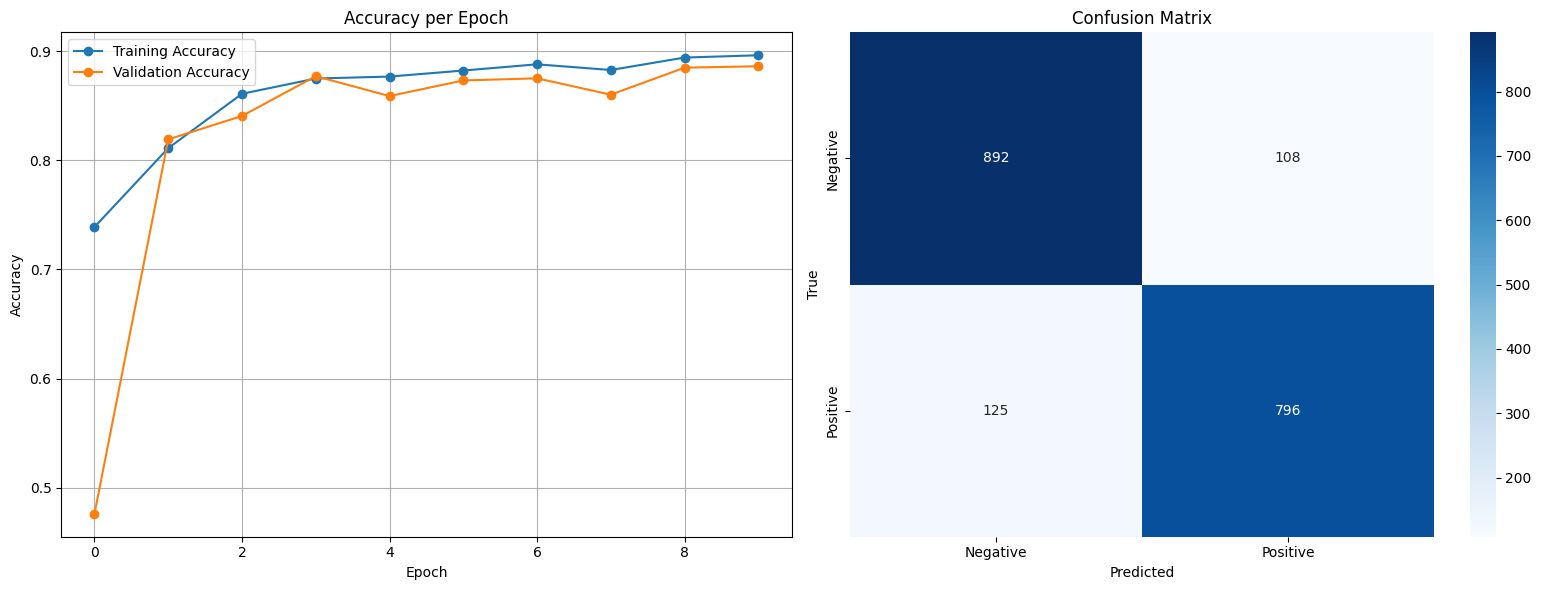

Accuracy: 0.88
Precision: 0.88
Recall: 0.86
F1-Score: 0.87


In [67]:
model,history = model_cnn('relu',0.005,train_images_cnn, train_labels_cnn,val_images_cnn, val_labels_cnn,10,32)
report_cnn(model,test_images_cnn,test_labels_cnn,history)

c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 26s 128ms/step - accuracy: 0.4856 - loss: 1.3031 - val_accuracy: 0.5277 - val_loss: 0.6924 - learning_rate: 0.0045
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 26s 136ms/step - accuracy: 0.5064 - loss: 0.6936 - val_accuracy: 0.4723 - val_loss: 0.6934 - learning_rate: 0.0041
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 27s 138ms/step - accuracy: 0.5261 - loss: 0.6927 - val_accuracy: 0.5277 - val_loss: 0.6923 - learning_rate: 0.0037
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 26s 135ms/step - accuracy: 0.5068 - loss: 0.6948 - val_accuracy: 0.5277 - val_loss: 0.6918 - learning_rate: 0.0034
Epoch 5/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 39s 124ms/step - accuracy: 0.5176 - loss: 0.6950 - val_accuracy: 0.5277 - val_loss: 0.6918 - learning_rate: 0.0030
Epoch 6/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 25s 128ms/step - accuracy: 0.5136 - loss: 0.6927 - val_accuracy: 0.4723 - val_loss: 0.6948 - learning_rate: 0.0027
Epoch 7/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 30s 153ms/step - accuracy: 0.5

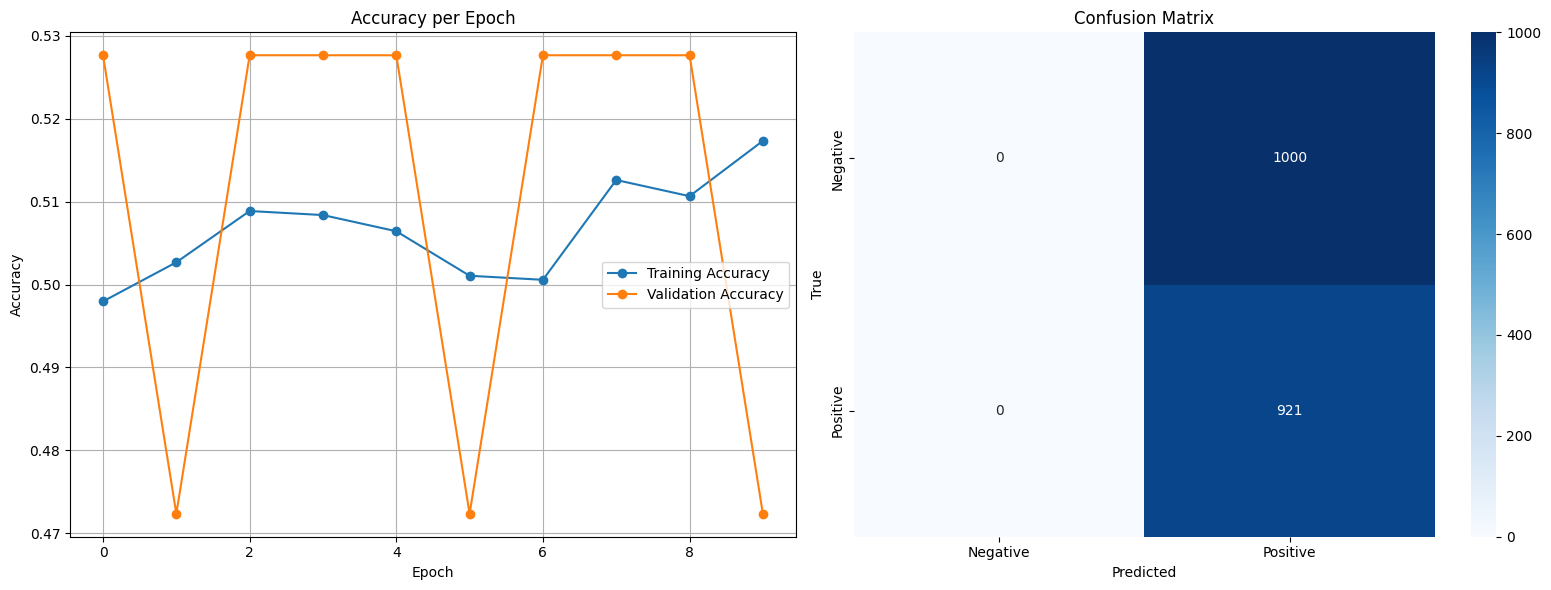

Accuracy: 0.48
Precision: 0.48
Recall: 1.00
F1-Score: 0.65


In [68]:
model,history = model_cnn('sigmoid',0.005,train_images_cnn, train_labels_cnn,val_images_cnn, val_labels_cnn,10,32)
report_cnn(model,test_images_cnn,test_labels_cnn,history)

### ReLU model with batch size 32 and learning rate 0.005 gave the best overall results. Sigmoid still isn't learning at all.

c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 24s 120ms/step - accuracy: 0.5496 - loss: 8.1069 - val_accuracy: 0.6747 - val_loss: 0.5808 - learning_rate: 0.0181
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.7150 - loss: 0.5535 - val_accuracy: 0.6923 - val_loss: 0.5699 - learning_rate: 0.0164
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 116ms/step - accuracy: 0.6944 - loss: 0.5593 - val_accuracy: 0.7476 - val_loss: 0.5018 - learning_rate: 0.0148
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 113ms/step - accuracy: 0.7427 - loss: 0.5260 - val_accuracy: 0.8107 - val_loss: 0.4379 - learning_rate: 0.0134
Epoch 5/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 24s 122ms/step - accuracy: 0.8030 - loss: 0.4432 - val_accuracy: 0.6923 - val_loss: 0.6021 - learning_rate: 0.0121
Epoch 6/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.8196 - loss: 0.4085 - val_accuracy: 0.7814 - val_loss: 0.4361 - learning_rate: 0.0110
Epoch 7/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.8

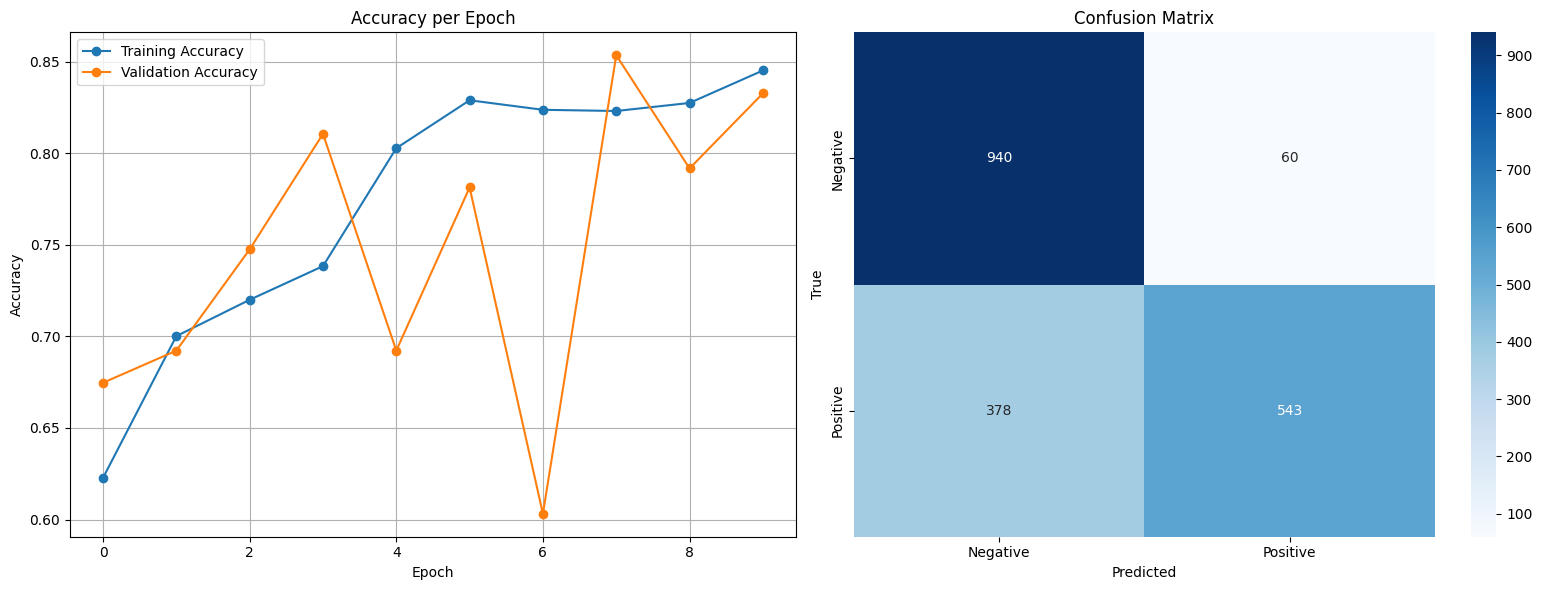

Accuracy: 0.77
Precision: 0.90
Recall: 0.59
F1-Score: 0.71


In [69]:
model,history = model_cnn('relu',0.02,train_images_cnn, train_labels_cnn,val_images_cnn, val_labels_cnn,10,32)
report_cnn(model,test_images_cnn,test_labels_cnn,history)

c:\Users\alkan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 24s 118ms/step - accuracy: 0.5025 - loss: 0.8229 - val_accuracy: 0.5277 - val_loss: 0.6917 - learning_rate: 0.0181
Epoch 2/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 117ms/step - accuracy: 0.4998 - loss: 0.6987 - val_accuracy: 0.4723 - val_loss: 0.6943 - learning_rate: 0.0164
Epoch 3/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 116ms/step - accuracy: 0.5013 - loss: 0.6991 - val_accuracy: 0.4723 - val_loss: 0.7098 - learning_rate: 0.0148
Epoch 4/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 115ms/step - accuracy: 0.5198 - loss: 0.6989 - val_accuracy: 0.5277 - val_loss: 0.7043 - learning_rate: 0.0134
Epoch 5/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 116ms/step - accuracy: 0.4931 - loss: 0.6985 - val_accuracy: 0.5277 - val_loss: 0.6936 - learning_rate: 0.0121
Epoch 6/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 22s 116ms/step - accuracy: 0.5186 - loss: 0.6941 - val_accuracy: 0.5277 - val_loss: 0.6991 - learning_rate: 0.0110
Epoch 7/10
193/193 ━━━━━━━━━━━━━━━━━━━━ 23s 119ms/step - accuracy: 0.5

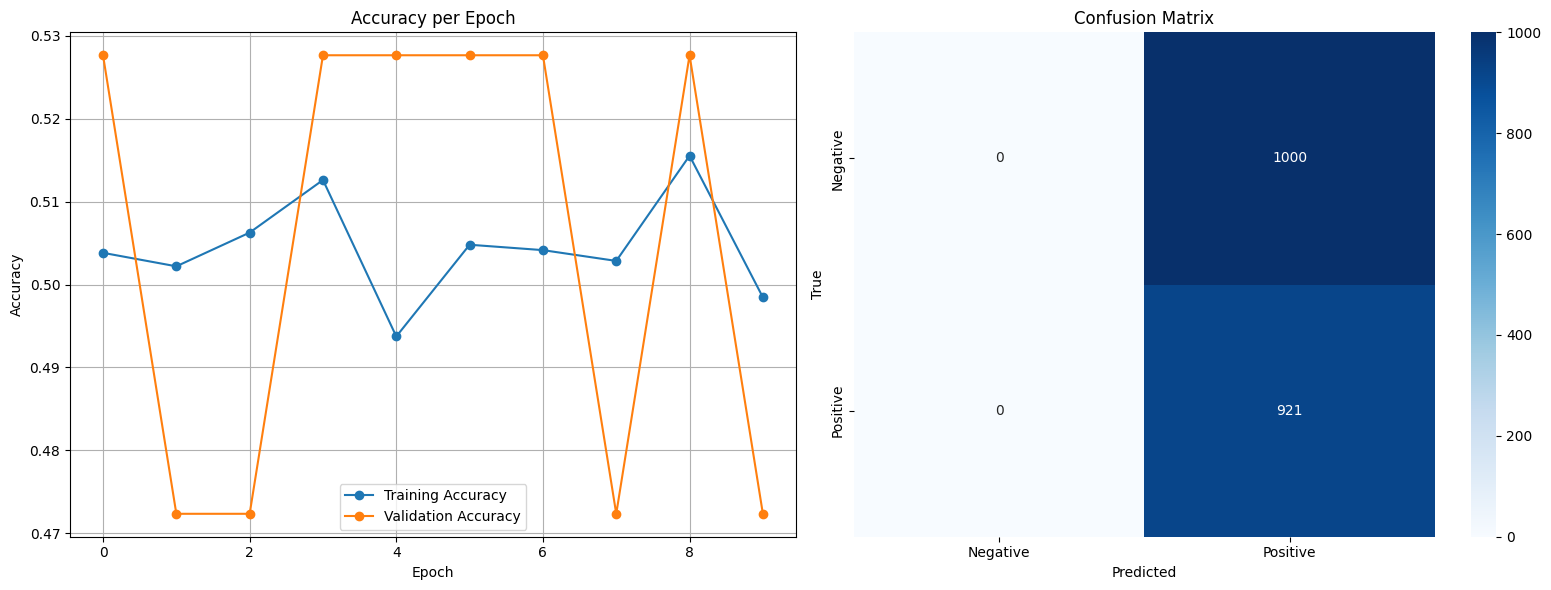

Accuracy: 0.48
Precision: 0.48
Recall: 1.00
F1-Score: 0.65


In [70]:
model,history = model_cnn('sigmoid',0.02,train_images_cnn, train_labels_cnn,val_images_cnn, val_labels_cnn,10,32)
report_cnn(model,test_images_cnn,test_labels_cnn,history)

### Relu is still better than sigmoid, sigmoid did not learn but the reLU model with batch size 32 still managed to get decent results for learning rate 0.02

# Report

\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline
\textbf{Batch Size} & \textbf{Input Size} & \textbf{Model} & \textbf{Activation Function} & \textbf{Learning Rate} & \textbf{Accuracy} & \textbf{Precision} & \textbf{Recall} & \textbf{F1} \\ \hline
16 & 124 & MLP & ReLU & 0.005 & 0.83 & 0.85 & 0.78 & 0.81 \\ \hline
16 & 124 & MLP & Sigmoid & 0.005 & 0.57 & 0.97 & 0.11 & 0.20 \\ \hline
16 & 124 & MLP & ReLU & 0.02 & 0.60 & 0.97 & 0.18 & 0.31 \\ \hline
16 & 124 & MLP & Sigmoid & 0.02 & 0.52 & 0.00 & 0.00 & 0.00 \\ \hline
16 & 50 & MLP & ReLU & 0.005 & 0.81 & 0.90 & 0.67 & 0.77 \\ \hline
16 & 50 & MLP & Sigmoid & 0.005 & 0.62 & 0.97 & 0.21 & 0.35 \\ \hline
16 & 50 & MLP & ReLU & 0.02 & 0.81 & 0.87 & 0.73 & 0.79 \\ \hline
16 & 50 & MLP & Sigmoid & 0.02 & 0.56 & 0.99 & 0.08 & 0.16 \\ \hline
16 & 124 & CNN & ReLU & 0.005 & 0.87 & 0.90 & 0.83 & 0.86 \\ \hline
16 & 124 & CNN & Sigmoid & 0.005 & 0.48 & 0.48 & 1.00 & 0.65 \\ \hline
16 & 124 & CNN & ReLU & 0.02 & 0.52 & 0.00 & 0.00 & 0.00 \\ \hline
16 & 124 & CNN & Sigmoid & 0.02 & 0.48 & 0.48 & 1.00 & 0.65 \\ \hline
32 & 124 & CNN & ReLU & 0.005 & 0.88 & 0.88 & 0.86 & 0.87 \\ \hline
32 & 124 & CNN & Sigmoid & 0.005 & 0.48 & 0.48 & 1.00 & 0.65 \\ \hline
32 & 124 & CNN & ReLU & 0.02 & 0.77 & 0.90 & 0.59 & 0.71 \\ \hline
32 & 124 & CNN & Sigmoid & 0.02 & 0.48 & 0.48 & 1.00 & 0.65 \\ \hline
\end{array}


Models using ReLU consistently performed better than those with Sigmoid. CNNs with ReLU activation achieved excellent results, such as an accuracy of 88% and an F1 score of 0.87 (batch size 32, learning rate 0.005). In contrast, models with Sigmoid often struggled, showing a pattern of poor accuracy (48%) and F1 scores around 0.65. This is likely due to Sigmoid's sensitivity to class imbalance and difficulty learning complex patterns.

Lower learning rates (0.005) yielded better and more stable performance for both MLP and CNN models. Higher learning rates (0.02) caused performance to drop significantly, especially when combined with Sigmoid activation. For example, CNNs with Sigmoid and a learning rate of 0.02 had consistently low accuracy and F1 scores, regardless of batch size or input size.

CNNs generally outperformed MLPs, especially with ReLU activation. For instance, CNNs with ReLU achieved an F1 score of 0.86 compared to 0.81 for MLPs (batch size 16, input size 124, learning rate 0.005). This aligns with the strength of CNNs in handling spatial data effectively. However, both architectures showed poor performance when paired with Sigmoid.

Models trained with smaller input sizes (50 vs. 124) showed similar or slightly lower performance. For example, MLPs with ReLU activation had an F1 score of 0.77 for input size 50 and 0.81 for input size 124, showing that larger inputs provided marginally better results.

Increasing the batch size to 32 slightly improved performance for CNNs with ReLU. For instance, the F1 score increased from 0.86 to 0.87 when the batch size was doubled, demonstrating that larger batch sizes can help CNNs generalize better.

ReLU is the clear choice for activation function, particularly when used with CNNs at a low learning rate of 0.005. This combination consistently delivered the best accuracy and F1 scores. Models using Sigmoid struggled across all configurations, likely due to optimization challenges and class imbalance issues. CNNs with ReLU activation and optimized hyperparameters (learning rate, batch size) stand out as the most robust models for these tasks.

In [1]:
!jupyter nbconvert Ass3.ipynb --to python